# RGB Classification data set

In [4]:
import zipfile
import tensorflow as tf
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import image_dataset_from_directory
from os import listdir
import shutil
from keras.applications import VGG16
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness, RandomTranslation, Input
from keras.models import Sequential, Model, load_model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy import asarray

In [4]:
# Check if we have access to GPU
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Becoming one with the data

In [3]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("dogs-vs-cats.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("test1.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("train.zip")
zip_ref.extractall()
zip_ref.close()

In [8]:
def split_images_by_prefix(source_dir, destination_dir_1, destination_dir_2, prefix):
    # Créer les dossiers de destination s'ils n'existent pas déjà
    os.makedirs(destination_dir_1, exist_ok=True)
    os.makedirs(destination_dir_2, exist_ok=True)

    # Parcourir les fichiers du dossier source
    for filename in os.listdir(source_dir):
            source_filepath = os.path.join(source_dir, filename)
            if os.path.isfile(source_filepath):
            # Vérifier si le nom du fichier commence par le préfixe
                if filename.startswith(prefix):
                    destination_filepath = os.path.join(destination_dir_1, filename)
                else:
                    destination_filepath = os.path.join(destination_dir_2, filename)

                # Copier le fichier vers le dossier de destination approprié
                shutil.copyfile(source_filepath, destination_filepath)

In [9]:
split_images_by_prefix("train", "train/cat", "train/dog", "cat")

In [5]:
train_dir = "train"
test_dir = "test1"
input_shape = (224, 224)
batch_size = 32

train_dataset, val_dataset = image_dataset_from_directory(train_dir,
                                                          batch_size=batch_size,
                                                          image_size=input_shape,
                                                          validation_split=0.2,
                                                          subset="both",
                                                          seed=42, 
                                                          label_mode="binary",
                                                          labels="inferred",
                                                          color_mode="rgb")                                                  

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


In [3]:
plot_losses = PlotLossesKeras()

In [5]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
    RandomBrightness(0.2),
])

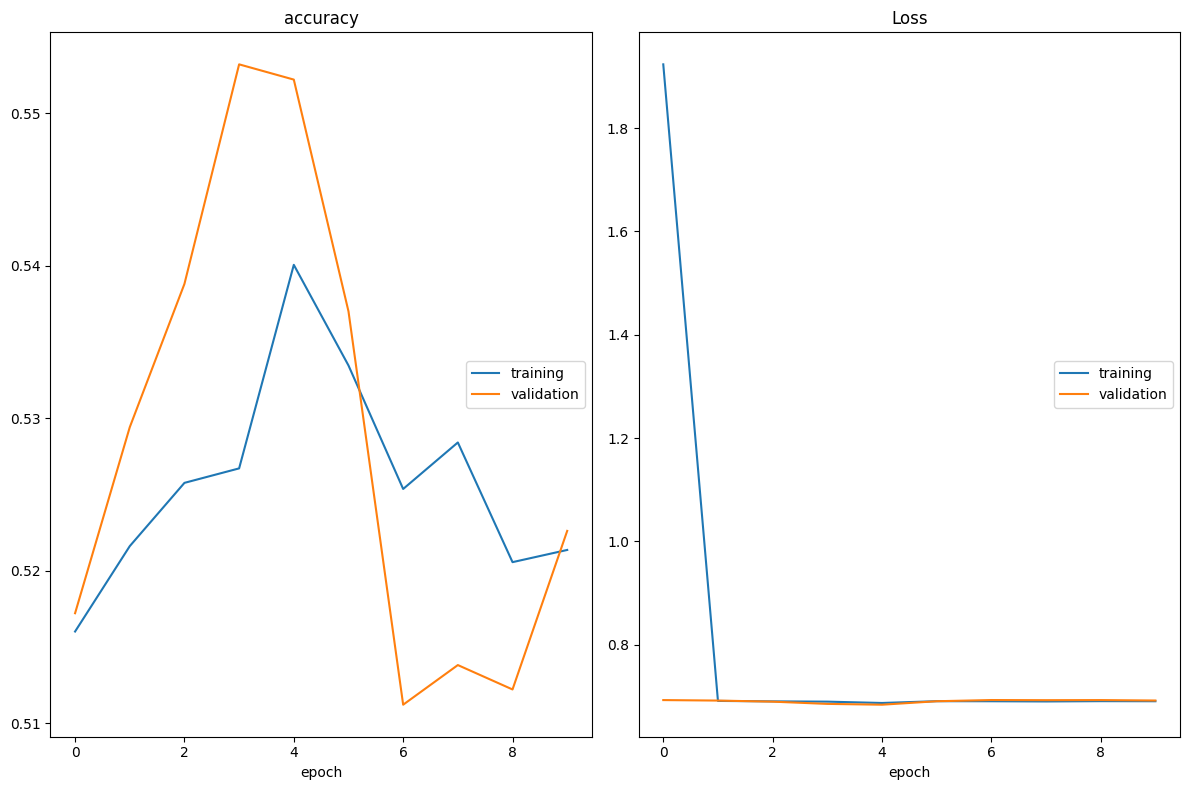

accuracy
	training         	 (min:    0.516, max:    0.540, cur:    0.521)
	validation       	 (min:    0.511, max:    0.553, cur:    0.523)
Loss
	training         	 (min:    0.687, max:    1.924, cur:    0.690)
	validation       	 (min:    0.684, max:    0.693, cur:    0.692)
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5159 - loss: 0.6905 - val_accuracy: 0.5226 - val_loss: 0.6917


In [7]:
model = Sequential([ 
    data_augmentation,
    Conv2D(32, (3, 3), activation="relu", input_shape=input_shape + (3,)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),  
    Dropout(0.2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),  
    Dropout(0.2),
    Flatten(),
    Dense(units=1, activation="sigmoid"),
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

hist = model.fit(train_dataset, 
                 epochs=10, 
                 validation_data=val_dataset,
                 callbacks=[EarlyStopping(patience=10), plot_losses])



In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)      │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)      │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 43264)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 1)                 │     43,265 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 298,757 (1.14 MB)

 Trainable params: 99,585 (389.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 199,172 (778.02 KB)

In [9]:
# unbach valdataset
labels = []
for image, label in val_dataset.unbatch():
    labels.append(label.numpy())

In [11]:
pred = model.predict(val_dataset)

  1/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [14]:
report = classification_report(labels, pred.round())

In [15]:
print(report)

              precision    recall  f1-score   support

         0.0       0.73      0.05      0.09      2462
         1.0       0.52      0.98      0.68      2538

    accuracy                           0.52      5000
   macro avg       0.62      0.52      0.38      5000
weighted avg       0.62      0.52      0.39      5000



In [16]:
# Count the number of files in each directory
# Specify the directory path
directory = "train"

# Initialize a dictionary to store the count of files in each directory
file_count = {}

# Iterate over the directories
for root, dirs, files in os.walk(directory):
    # Count the number of files in the current directory
    count = len(files)
    
    # Store the count in the dictionary
    file_count[root] = count

# Print the count of files in each directory
for directory, count in file_count.items():
    print(f"{directory}: {count} files")


train: 25000 files
train/dog: 12500 files
train/cat: 12500 files


## Training the model with pre-trained VGG16

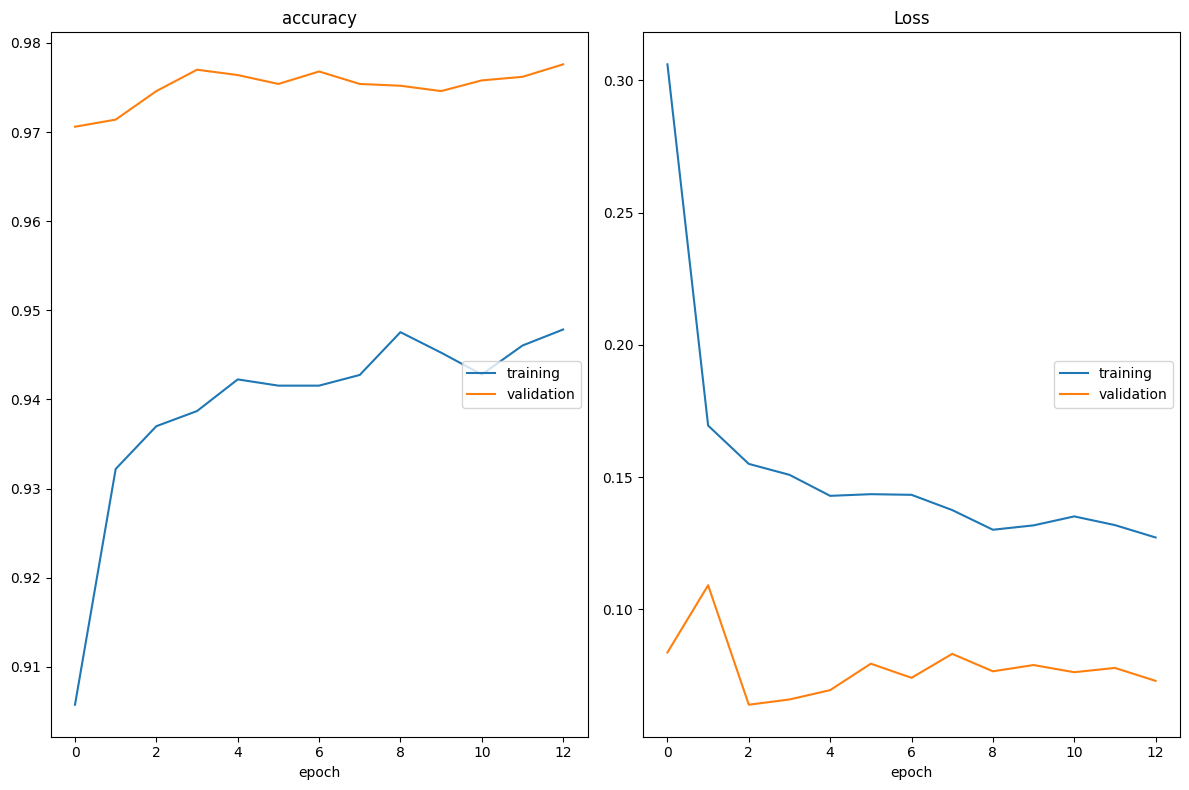

accuracy
	training         	 (min:    0.906, max:    0.948, cur:    0.948)
	validation       	 (min:    0.971, max:    0.978, cur:    0.978)
Loss
	training         	 (min:    0.127, max:    0.306, cur:    0.127)
	validation       	 (min:    0.064, max:    0.109, cur:    0.073)
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.9472 - loss: 0.1271 - val_accuracy: 0.9776 - val_loss: 0.0730


In [9]:
# load model
model_trained = VGG16(include_top=False)
 # mark loaded layers as not trainable
for layer in model_trained.layers:
   layer.trainable = False

 # add new classifier layers
inputs = Input(shape=(224, 224, 3))
data_augmented = data_augmentation(inputs)
vgg_output = model_trained(data_augmented, training=False)
flat1 = Flatten()(vgg_output)
class1 = Dense(32, activation='relu')(flat1)
outputs = Dense(1, activation='sigmoid')(class1)
# define new model
model_custom = Model(inputs=inputs, outputs=outputs)

# compile model
model_custom.compile(optimizer='adam', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

# fit model
hist = model_custom.fit(train_dataset,
                         epochs=20,
                         validation_data=val_dataset,
                         callbacks=[EarlyStopping(patience=10), plot_losses])

In [16]:
model_custom.save('model_custom.keras')

In [7]:
# load model
model_custom = load_model('model_custom.keras')

In [8]:
# summarize
model_custom.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)         │ 14,714,688 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 25088)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 32)                │    802,848 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 1)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 46,552,709 (177.58 MB)

 Trainable params: 15,517,569 (59.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,035,140 (118.39 MB)

In [13]:
pred = model_custom.predict(val_dataset)

  1/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step

157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step


In [8]:
# unbach valdataset
labels = []
images = []
for image, label in val_dataset.unbatch():
    labels.append(label.numpy())
    images.append(image.numpy())

In [7]:
accuracy_score(labels, pred.round())

0.9776

In [22]:
report = classification_report(labels, pred.round())
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2462
         1.0       0.97      0.98      0.98      2538

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



In [9]:
classes = ["cat", "dog"]

In [10]:
def plot_images(images, pred, labels=None):
    plt.figure(figsize=(23, 12))
    random_number = random.randint(0, len(labels))
    if labels is not None:
        for index, (image, prediction, label) in enumerate(zip(images[random_number:random_number+15], pred[random_number:random_number+15], labels[random_number:random_number+15])):
            if int(prediction.item()) == int(label.item()):
                plt.subplot(3, 5, index+1)
                plt.imshow(image/255.)
                plt.title(f"Predicted: {classes[int(prediction.item())]}\nTrue: {classes[int(label.item())]}", color="green") 
                plt.axis("off")
            else:
                plt.subplot(3, 5, index+1)
                plt.imshow(image/255.)
                plt.title(f"Predicted: {classes[int(prediction.item())]}\nTrue: {classes[int(label.item())]}", color="red") 
                plt.axis("off")
    else:
        for index, (image, prediction) in enumerate(zip(images[random_number:random_number+15], pred[random_number:random_number+15])):
            plt.subplot(3, 5, index+1)
            plt.imshow(image/255.)
            plt.title(f"Predicted: {classes[int(prediction)]}")
            plt.axis("off")

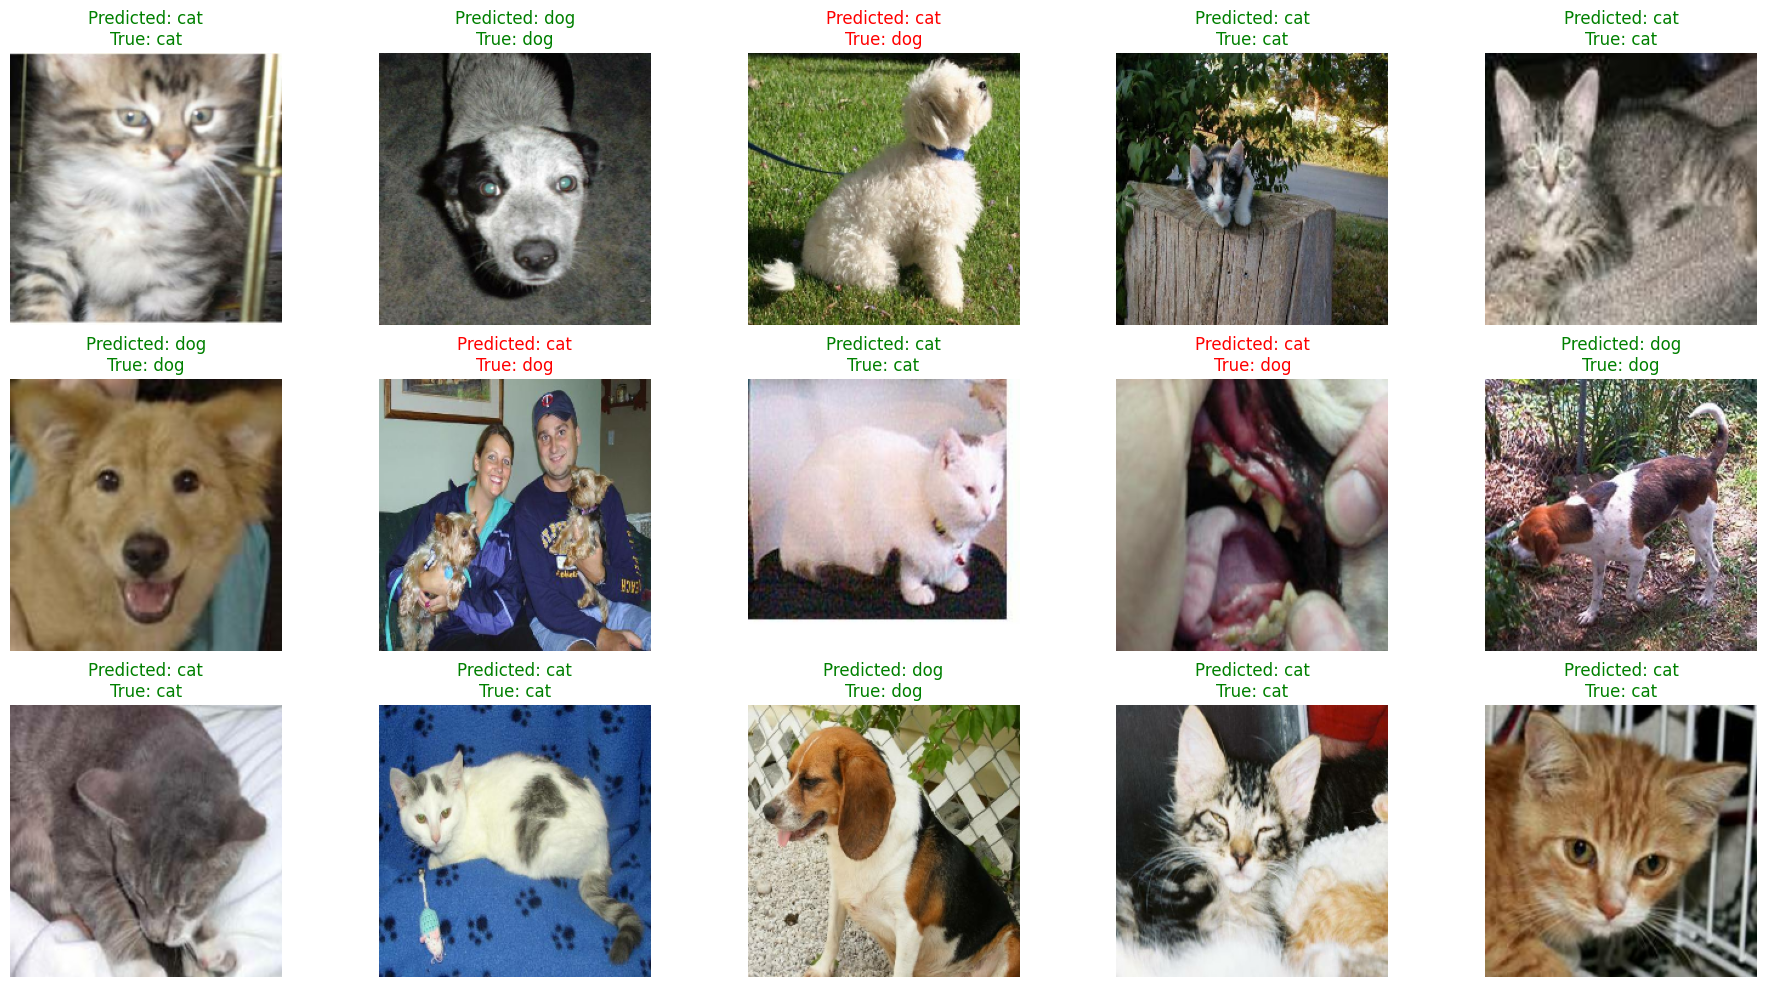

In [14]:
plot_images(images, np.array(pred, dtype=int), np.array(labels, dtype=int))

In [27]:
images_test = []
# Create test dataset
for test_filename in os.listdir("test1"):
    test_filepath = os.path.join("test1", test_filename)
    img = load_img(test_filepath, target_size=input_shape)
    img_array = img_to_array(img)
    img_array = img_array / 255.
    images_test.append(img_array)

In [6]:
images_test_array = np.array(images_test, dtype=np.float32)

In [7]:
# Ajouter la dimension de lot (batch)
images_test_batch = np.expand_dims(images_test_array, axis=0)